In [22]:
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [23]:
df = pd.read_csv("AirlineTweets.csv")
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [24]:
df = df[['airline_sentiment','text']]
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

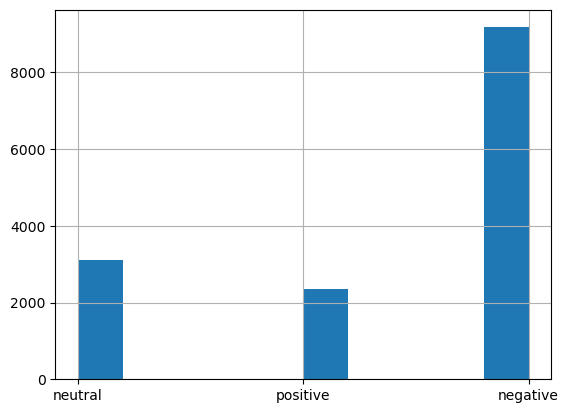

In [25]:
df['airline_sentiment'].hist()

In [26]:
df = df[df['airline_sentiment']!='neutral'].copy()
df.head()

,airline_sentiment,text
1,positive,@VirginAmerica plus you've added commercials t...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [27]:
target_map = {'positive':1,'negative':0}
df['target'] = df['airline_sentiment'].map(target_map)
df.head()

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [28]:
df_train, df_test = train_test_split(df, random_state=42)

In [29]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['text'])
X_test = vectorizer.transform(df_test['text'])

In [30]:
# data must not be sparse matrix before passing into tensorflow
X_train = X_train.toarray()
X_test = X_test.toarray()

In [31]:
Y_train = df_train['target']
Y_test = df_test['target']

In [32]:
# input dimensions
D = X_train.shape[1]

In [33]:
i = Input(shape=(D,))
x = Dense(1)(i)

In [34]:
model = Model(i,x)

In [35]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2000)]            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2001      
                                                                 
Total params: 2001 (7.82 KB)
Trainable params: 2001 (7.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model.compile(
  loss=BinaryCrossentropy(from_logits=True),
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy']
)

In [37]:
r = model.fit(
  X_train, Y_train,
  validation_data=(X_test, Y_test),
  epochs=40,
  batch_size=128,
)

Epoch 1/40
68/68 [==============================] - 1s 4ms/step - loss: 0.4998 - accuracy: 0.7920 - val_loss: 0.3965 - val_accuracy: 0.8049
Epoch 2/40
68/68 [==============================] - 0s 2ms/step - loss: 0.3747 - accuracy: 0.7970 - val_loss: 0.3395 - val_accuracy: 0.8219
Epoch 3/40
68/68 [==============================] - 0s 2ms/step - loss: 0.3215 - accuracy: 0.8194 - val_loss: 0.3028 - val_accuracy: 0.8416
Epoch 4/40
68/68 [==============================] - 0s 2ms/step - loss: 0.2842 - accuracy: 0.8456 - val_loss: 0.2773 - val_accuracy: 0.8593
Epoch 5/40
68/68 [==============================] - 0s 2ms/step - loss: 0.2570 - accuracy: 0.8644 - val_loss: 0.2586 - val_accuracy: 0.8753
Epoch 6/40
68/68 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.8817 - val_loss: 0.2447 - val_accuracy: 0.8870
Epoch 7/40
68/68 [==============================] - 0s 2ms/step - loss: 0.2199 - accuracy: 0.8925 - val_loss: 0.2340 - val_accuracy: 0.9006
Epoch 8/40
68/68 [==

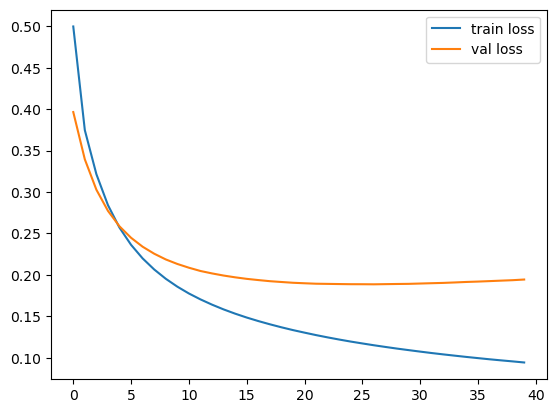

In [38]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend();

In [39]:
P_train = ((model.predict(X_train) > 0) * 1.0).flatten()
P_test = ((model.predict(X_test) > 0) * 1.0).flatten()

91/91 [==============================] - 0s 752us/step


In [40]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.99008023, 0.00991977],
       [0.09277778, 0.90722222]])